In [1]:
import numpy as np
import matplotlib.pyplot as plt

from PointTracking import PointTracker as pt
from classicalfield_orig import FiniteTempGPE as gpe

Total Imag Time:  1.3069205284118652
kmax:  4.0212385965949355
T:  0.8085179925372403
(21, 128, 128)
(1, 128, 128)


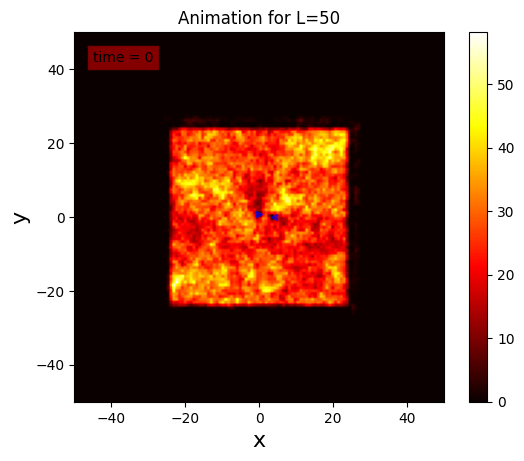

In [2]:
g = gpe(npoints = 2**6, numImagSteps = 2000, numRealSteps = 5000, dtcoef = 0.0005, boxthickness = 0.4, Nsamples = 1, runAnim = True, animFileName = 'test.mp4', Tfact = 1/10, dst = False, vortex = True)

In [3]:
tracker = pt(g.snaps, g.dx, g.L)

In [4]:
for point in tracker.points: 
    print(point.getCoors())

(24.609375, 28.515625)
(25.390625, 24.609375)


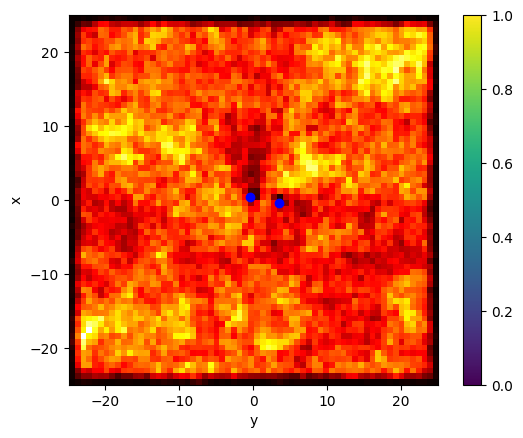

In [10]:
psi = g.snaps[0] 
L = g.L
dx = g.dx 
box = psi[int(L/2/dx):int(3*L/2/dx), int(L/2/dx):int(3*L/2/dx)]
plt.figure() 
plt.imshow(np.abs(box)**2, cmap = plt.cm.hot, origin = 'lower', extent = [-L/2, L/2, -L/2, L/2])
for point in tracker.points: 
    plt.scatter(point.getCoors()[1]-L/2,point.getCoors()[0]-L/2, color = 'blue')
plt.xlabel('y')
plt.ylabel('x')
plt.colorbar() 

### Test the tracking when a new vortex is detected 

In [22]:
print(np.shape(g.snaps))
snap = 10

(21, 128, 128)


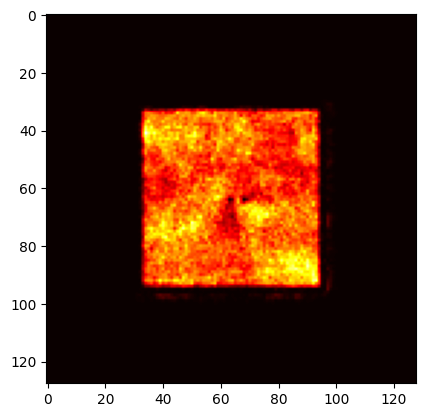

In [23]:
plt.figure() 
plt.imshow(np.abs(g.snaps[snap])**2, cmap = plt.cm.hot)
plt.show() 

In [24]:
vortices, antivortices = pt.detectVortices(tracker, g.snaps[snap])

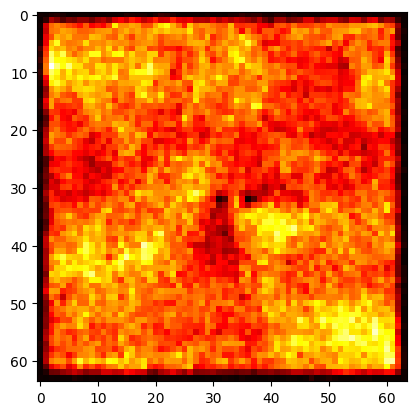

In [27]:
plt.figure() 
plt.imshow(np.abs(g.snaps[snap][int(g.L/2/g.dx):int(3*g.L/2/g.dx), int(g.L/2/g.dx):int(3*g.L/2/g.dx)])**2, cmap = plt.cm.hot)